## 💻 UnpackAI DL201 Bootcamp - Week 3 - Concepts: Model training

### 📕 Learning Objectives

* Reinforce and consolidate ideas about the model training loop through discussion and 2 illustrative examples.

### 📖 Concepts map
* Model as a function
* Inputs, outputs and weights
* Forward pass
* Loss function
* Gradiants
* Backward pass
* Training loop

### Single-neuron example
- Define and unknwown function F(x) = 2X as F(w) = WX, where W is a parameter. 
- Perform a simple Numpy implementation of a model with a single neuron.
- The model performs a forward pass through the network to make a prediction.
- The mean squared error is defined as the loss function.
- Gradient descend is set as the optimizer to minimize the loss function.
- The model performs a backward pass to update the weights.
- The model is trained to minimize the loss function.

Credit: This example is based on the pytorch tutorial from: https://www.youtube.com/watch?v=VVDHU_TWwUg&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=7&ab_channel=PythonEngineer

In [1]:
# Import packages
import numpy
import torch
import matplotlib.pyplot as plt

In [2]:
# Create the inputs and the outputs numpy arrays for the function y = 2x
X = numpy.array([1, 2, 3, 4], dtype='float')
Y = numpy.array([2, 4, 6, 8], dtype='float')

In [3]:
# Initialize the weight as zero
W = 0.0

In [4]:
# Define a function for the forward pass (it makes a prediction)
def forward(x, w):
    return w * x

In [5]:
# Define a function for the loss (it measures the error)
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()

In [6]:
# Define a function to compute the gradient of the loss
# Note: this is equivalent to the derivative of the loss function with respect to the weight
def gradient(x, y, y_predicted):
    return numpy.dot(2 * x, y_predicted - y).mean()

In [7]:
# Configure a trining loop
learning_rate = 0.01
number_steps = 10
loss_values = []
weights = []

In [8]:
# Perform a training loop, save the loss and print the loss and the prediction every 100 steps
for i in range(number_steps):

    # Perform the forward pass (prediction)
    y_pred = forward(X, W)

    # Compute loss
    loss_value = loss(Y, y_pred)
    loss_values.append(loss_value)

    # Compute gradient
    grad = gradient(X, Y, y_pred)

    # Update the weight
    W -= learning_rate * grad
    weights.append(W)

    # Print the loss and the prediction every 100 steps
    print(f'- steps: {i + 1}, loss: {loss_value}, weight: {W}')

- steps: 1, loss: 30.0, weight: 1.2
- steps: 2, loss: 4.800000000000001, weight: 1.68
- steps: 3, loss: 0.7680000000000002, weight: 1.8719999999999999
- steps: 4, loss: 0.12288000000000023, weight: 1.9487999999999999
- steps: 5, loss: 0.019660800000000138, weight: 1.97952
- steps: 6, loss: 0.0031457280000000165, weight: 1.991808
- steps: 7, loss: 0.0005033164799999944, weight: 1.9967232
- steps: 8, loss: 8.053063680000391e-05, weight: 1.99868928
- steps: 9, loss: 1.2884901887999318e-05, weight: 1.999475712
- steps: 10, loss: 2.061584302080135e-06, weight: 1.9997902848


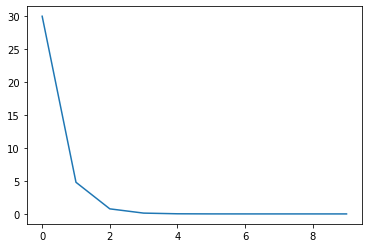

In [9]:
# Plot the loss against the number of steps
plt.plot(loss_values)
plt.show()

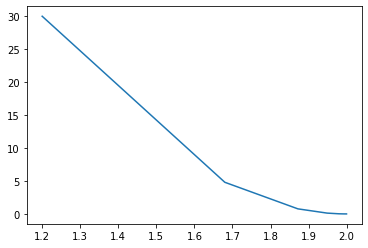

In [10]:
# Plot the predictions against the loss
plt.plot(weights, loss_values)
plt.show()

The same code now redifined in Pytorch.

In [11]:
# Define X and Y as tensors
X = torch.tensor([1, 2, 3, 4, 5, 6], dtype=torch.float)
Y = torch.tensor([2, 4, 6, 8, 10, 12], dtype=torch.float)

In [12]:
# Define the weight, as gradients are computed with respect to the weight, we enable autograd
W = torch.tensor(0.0, dtype=torch.float, requires_grad=True)

In [15]:
# Perform a the same training loop, now in Pytorch
for i in range(number_steps):

    # Forward function can be reused
    y_pred = forward(X, W)

    # Loss function can be reused
    loss_value = loss(Y, y_pred)

    # Compute gradient
    loss_value.backward()   # Computes the gradient with respect to the weight

    # Update the weight, we reset the gradients to zero
    with torch.no_grad():
        W -= learning_rate * W.grad
    W.grad.zero_()

    # Print the loss and the prediction every 100 steps
    print(f'- steps: {i + 1}, loss: {loss_value}, weight: {W}')

- steps: 1, loss: 60.66666793823242, weight: 1.8200000524520874
- steps: 2, loss: 0.4913997948169708, weight: 1.8746000528335571
- steps: 3, loss: 0.2384980171918869, weight: 1.9126380681991577
- steps: 4, loss: 0.1157536581158638, weight: 1.9391378164291382
- steps: 5, loss: 0.056180473417043686, weight: 1.957599401473999
- steps: 6, loss: 0.02726683020591736, weight: 1.9704608917236328
- steps: 7, loss: 0.013233810663223267, weight: 1.9794211387634277
- steps: 8, loss: 0.006422908511012793, weight: 1.9856634140014648
- steps: 9, loss: 0.0031173217575997114, weight: 1.9900121688842773
- steps: 10, loss: 0.0015129776438698173, weight: 1.993041753768921


### MNIST Pytorch implementation

In [16]:
# Import packages
import torch
import torchvision
import torch.nn.functional as model_functions
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch import optim
from torch import nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [17]:
# Download and load the MNIST dataset
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [18]:
# Inspect the data (training)
print(mnist_train.train_data.size())
print(mnist_train.train_labels.size())

torch.Size([60000, 28, 28])
torch.Size([60000])


C:\Users\lenis\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\Users\lenis\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


(28, 28)
5


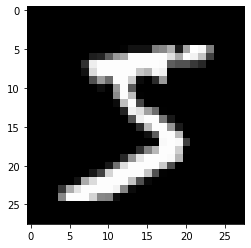

In [19]:
# Shown an example image
sample_image = mnist_train.train_data[0].clone().numpy()
sample_label = mnist_train.train_labels[0].clone().numpy()
print(sample_image.shape)
print(sample_label)
plt.imshow(sample_image, cmap='gray')
plt.show()


In [20]:
# Create dataloaders
batch_size = 64
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=True)

In [21]:
# Define a model, a simple feed-forward network with 3 hidden layers
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(28*28, 256)
        self.layer2 = nn.Linear(256, 256)
        self.layer3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = model_functions.relu(self.layer1(x))
        x = model_functions.relu(self.layer2(x))
        x = self.layer3(x)
        return x

In [22]:
# Define a loss function and optimizer
model = Model()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [23]:
# Use 3 epochs to train the model, collect the loss values and weights to plot later
loss_values = []
number_of_epochs = 3

for epoch in range(number_of_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):

        # Forward pass
        output = model(data)
        loss = loss_fn(output, target)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Collect loss values
        loss_values.append(loss.item())

    # Print progress
    if batch_idx % 10000 == 0:
        print('Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item()))

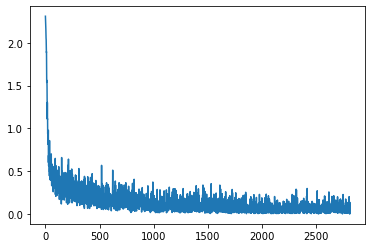

In [24]:
# Plot the loss vs the batch number
plt.plot(loss_values)
plt.show()

In [25]:
# Evaluate the model on the test set
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += loss_fn(output, target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

# Print the accuracy
test_loss /= len(test_loader.dataset)
accuracy = 100. * correct / len(test_loader.dataset)
print(accuracy)

97.71


## Appendix images for discussion

### Approximation of a function's output
![](https://tse3-mm.cn.bing.net/th/id/OIP-C.n0HqvV-DCIER1MAYOfbEBQHaC_?pid=ImgDet&rs=1)
![](https://img1.cgtrader.com/items/2172133/f0a4b3e843/displacement-landscape-shader-050-3d-model-c4d.jpg)

### Neural networks as an approximation of a function
![](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_activation%20functions%20deep%20learning_0.png
)

![](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/4_activation%20functions%20deep%20learning_0.png)
- image link: https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images
- image link: https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_activation%20functions%20deep%20learning_0.png


### A simple view of a neuron
![](https://learnopencv.com/wp-content/uploads/2017/10/neuron-diagram-768x432.jpg)
- image credit: https://learnopencv.com


### Gradient descend
![](https://learnopencv.com/wp-content/uploads/2017/10/gradient-descent-2d-diagram.png)
- image credit: https://learnopencv.com

### Activation functions
![](https://mlfromscratch.com/content/images/size/w2000/2019/12/activation-functions.gif)
- image credit: https://mlfromscratch.com